In [6]:
import pandas as pd
import numpy as np
from IPython.display import display
from fastai.imports import *
from sklearn import metrics
from pandas.tseries.offsets import DateOffset
import matplotlib.pyplot as plt
import seaborn as sns

hour_ahead = 24
Top = 30

path = "/content/drive/MyDrive/Colab Notebooks/Project/star_data_set.csv"
Merge_all = pd.read_csv(path)
dti = pd.to_datetime(Merge_all['DateTime'], format='%Y-%m-%d %H', exact=False)
Merge_all.set_index(pd.Index(dti), inplace=True)
Merge_all.drop(['DateTime'], axis=1, inplace=True)

First = Merge_all.iloc[0:11000, :]
N_index = First.shape
Y_temp = First['FI']
Y = Y_temp.iloc[hour_ahead:N_index[0]]
#Y = Y.to_numpy()



X_temp1 = First['FI']
X_temp2 = First.loc[:, First.columns != 'FI']
X_temp2_index = X_temp2.index + DateOffset(hours=-hour_ahead)
X_temp2.set_index(X_temp2_index, inplace=True)
X_temp1 = X_temp1.to_frame()
X_temp = X_temp1.join(X_temp2)
X = X_temp.iloc[0:N_index[0] - hour_ahead]
#X = X.to_numpy()

"""
from sklearn.linear_model import LinearRegression
model2 = LinearRegression()
model2.fit(X, Y)
importance2 = model2.coef_
FeatureR = []
FeatureR_index = X.columns
for i,v in enumerate(importance2):
    FeatureR.append(v)

Yfri = pd.DataFrame({'Index':FeatureR_index})
Yfr = pd.DataFrame({'Y':FeatureR})
Yfr.index = Yfri['Index']
Yfr.sort_values(by=['Y'], inplace=True)




TopIndex = Yfr.index[(789-Top):789] 
X.drop(X.columns.difference(TopIndex), axis=1, inplace=True)

"""

Pred_index = X.shape
print("Shape = "+str(Pred_index))

Shape = (10976, 30)


In [7]:
X.info() 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10976 entries, 2013-01-01 00:00:00 to 2014-04-03 05:00:00
Data columns (total 30 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   FI                             10976 non-null  float64
 1   3_Precipitation amount (mm)    10976 non-null  float64
 2   3_Air temperature (degC)       10976 non-null  float64
 3   5_Precipitation amount (mm)    10976 non-null  float64
 4   6_Cloud amount (1/8)           10976 non-null  float64
 5   20_Precipitation amount (mm)   10976 non-null  float64
 6   41_Wind speed (m/s)            10976 non-null  float64
 7   42_Wind speed (m/s)            10976 non-null  float64
 8   46_Precipitation amount (mm)   10976 non-null  float64
 9   47_Precipitation amount (mm)   10976 non-null  float64
 10  62_Wind speed (m/s)            10976 non-null  float64
 11  77_Wind speed (m/s)            10976 non-null  float64
 12  95_Air temp

In [8]:
X.describe()

,FI,3_Precipitation amount (mm),3_Air temperature (degC),5_Precipitation amount (mm),6_Cloud amount (1/8),20_Precipitation amount (mm),41_Wind speed (m/s),42_Wind speed (m/s),46_Precipitation amount (mm),47_Precipitation amount (mm),62_Wind speed (m/s),77_Wind speed (m/s),95_Air temperature (degC),98_Precipitation amount (mm),99_Wind speed (m/s),105_Air temperature (degC),110_Precipitation amount (mm),120_Air temperature (degC),124_Air temperature (degC),124_Wind speed (m/s),131_Precipitation amount (mm),141_Air temperature (degC),143_Wind speed (m/s),149_Air temperature (degC),157_Wind speed (m/s),159_Precipitation amount (mm),159_Air temperature (degC),176_Precipitation amount (mm),Quarter,Working_Time
count,10976.000000,10976.000000,10976.000000,10976.000000,10976.000000,10976.000000,10976.000000,10976.000000,10976.000000,10976.000000,10976.000000,10976.000000,10976.000000,10976.000000,10976.000000,10976.000000,10976.000000,10976.000000,10976.000000,10976.000000,10976.000000,10976.000000,10976.000000,10976.000000,10976.000000,10976.000000,10976.000000,10976.000000,10976.000000,10976.000000
mean,39.964653,-0.139971,4.799184,-0.436974,4.984133,-0.364359,1.786105,4.399935,-0.480825,-0.269179,2.605851,4.980655,-0.251771,-0.381807,2.996141,3.871097,-0.446267,2.565371,4.278428,4.287574,-0.255073,-2.478128,3.464631,3.855631,1.391930,-0.303238,4.650238,-0.141762,2.215015,0.268039
std,11.641707,1.154111,9.260059,1.150936,3.542406,1.207411,1.863563,2.207565,1.183040,1.147345,1.898686,2.588130,10.705005,1.200918,2.194453,10.262757,1.190415,10.404079,9.307740,2.239216,1.174561,11.448670,2.373410,9.791557,1.664832,1.179259,9.954167,1.140386,1.164884,0.442958
min,1.380000,-4.731586,-21.962097,-4.870721,-3.289055,-4.823513,-3.716952,-2.298090,-4.838269,-4.415064,-3.017207,-2.128727,-30.133576,-4.279096,-2.606108,-26.708495,-4.228167,-27.767515,-23.748170,-2.099196,-4.333505,-38.692190,-2.779733,-28.173528,-3.175514,-4.311376,-28.910345,-4.720523,1.000000,0.000000
25%,33.040000,-0.890867,-1.090648,-1.208684,1.086579,-1.169362,0.461033,2.841710,-1.294614,-1.033209,1.312702,3.118220,-7.608271,-1.168528,1.449465,-3.009108,-1.258709,-3.826424,-1.680004,2.719234,-1.035147,-8.902561,1.763522,-2.486538,0.193524,-1.088746,-1.636041,-0.883901,1.000000,0.000000
50%,38.040000,-0.152802,3.811708,-0.436034,6.516923,-0.391844,1.608253,4.205439,-0.501256,-0.263025,2.430640,4.716149,-1.482099,-0.405268,2.768963,2.563396,-0.481676,1.691062,3.290740,4.042413,-0.269799,-2.387407,3.323259,2.714123,1.240942,-0.309059,3.549925,-0.134872,2.000000,0.000000
75%,44.342500,0.608748,12.123950,0.334072,7.796735,0.396128,2.906718,5.774166,0.302762,0.494149,3.660204,6.528280,7.946800,0.384386,4.286443,12.221342,0.322120,10.152378,12.066694,5.623585,0.513165,6.305571,4.983041,12.332562,2.411640,0.454036,12.614081,0.601673,3.000000,1.000000
max,210.010000,18.968407,29.728199,6.205133,11.733908,14.225409,12.617602,16.797027,8.291374,6.271807,15.113677,15.519720,29.606761,16.426991,14.747982,30.684227,8.440818,28.722414,29.658977,15.626315,8.949515,25.756035,15.304502,30.844564,10.084602,14.722880,29.940695,17.967021,4.000000,1.000000


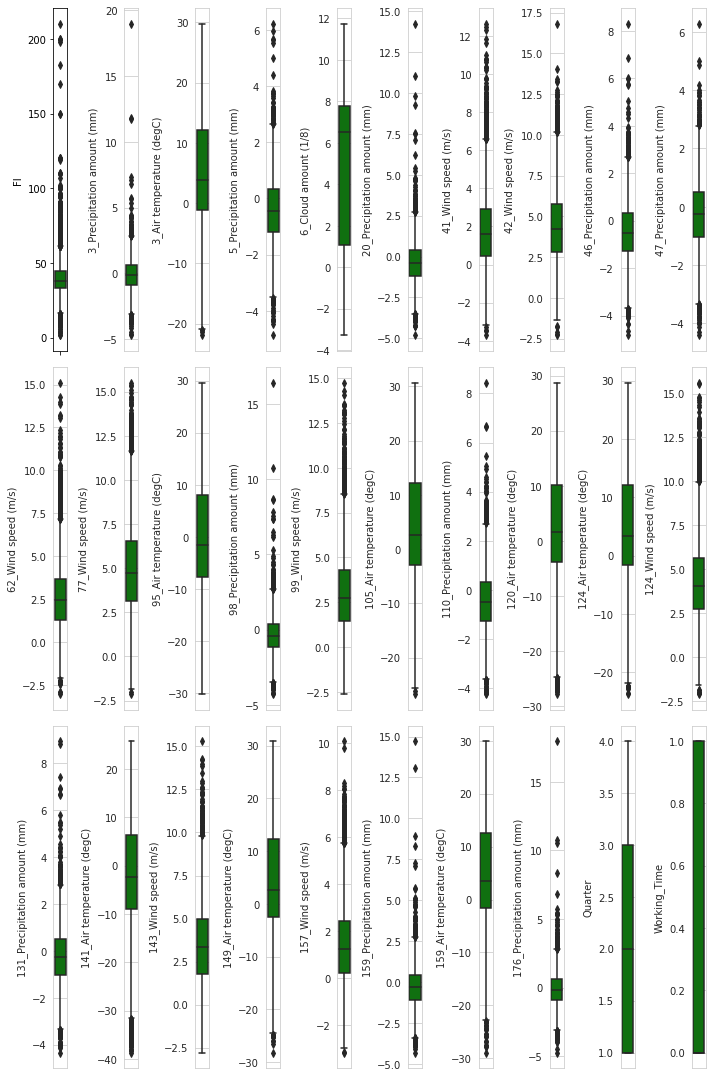

In [9]:
import warnings
warnings.filterwarnings("ignore")

l = X.columns.values
number_of_columns=10
number_of_rows = len(l)-1/number_of_columns
plt.figure(figsize=(number_of_columns,5*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.set_style('whitegrid')
    sns.boxplot(y=X[l[i]],color='green')
    plt.tight_layout()

warnings.filterwarnings("default")

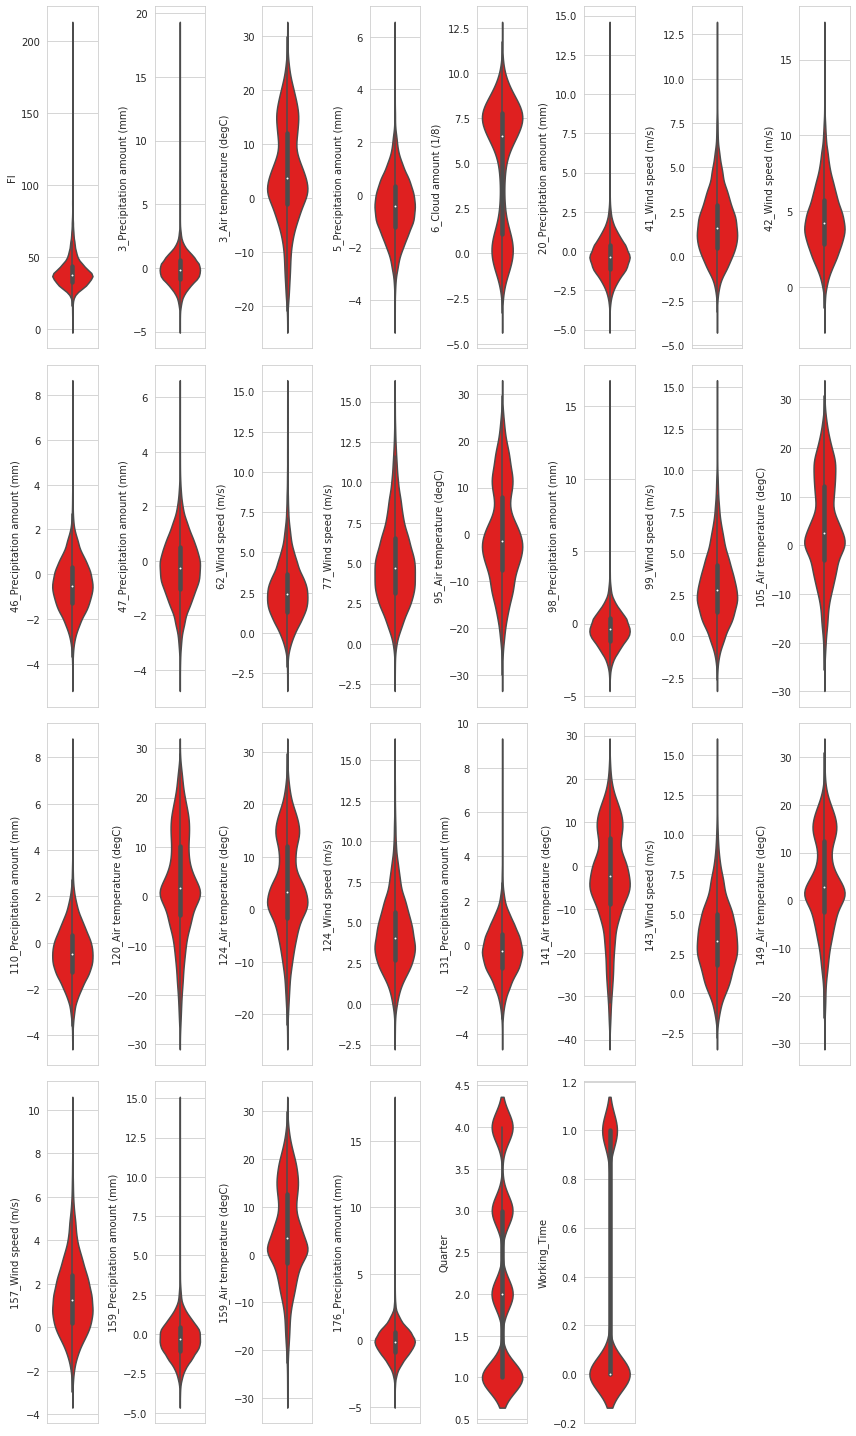

In [10]:
l = X.columns.values
number_of_columns=8
number_of_rows = len(l)-1/number_of_columns
plt.figure(figsize=(1.5*number_of_columns,5*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.set_style('whitegrid')
    sns.violinplot(y=X[l[i]],color='red')
    plt.tight_layout()

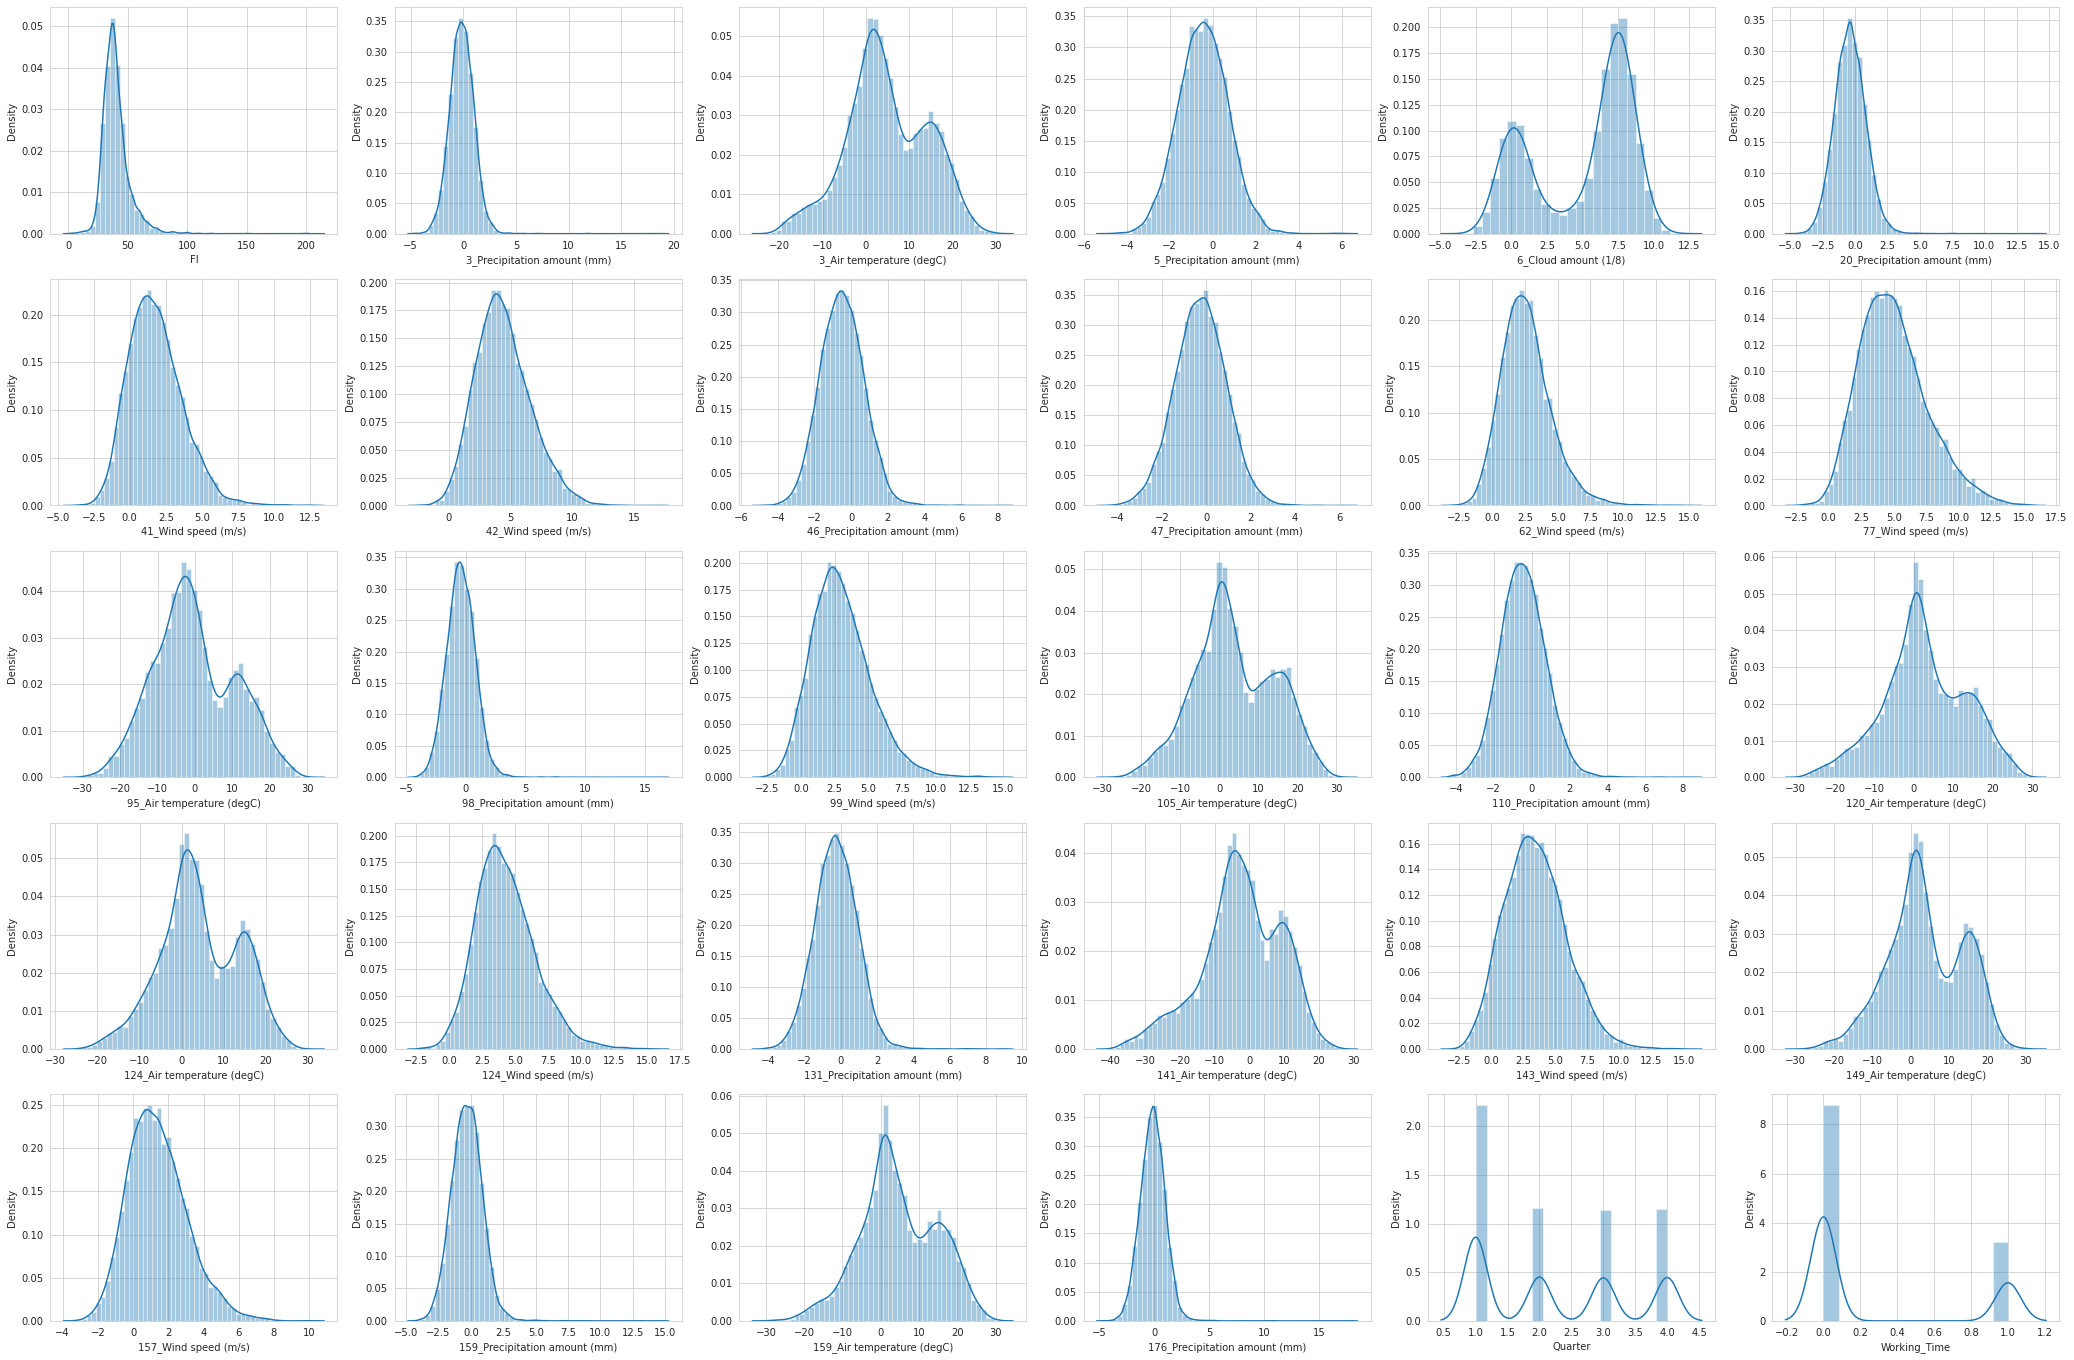

In [11]:
import warnings
warnings.filterwarnings("ignore")

l = X.columns.values
number_of_columns=6
number_of_rows = len(l)-1/number_of_columns
plt.figure(figsize=(6*number_of_columns,5*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.distplot(X[l[i]],kde=True) 

warnings.filterwarnings("default")

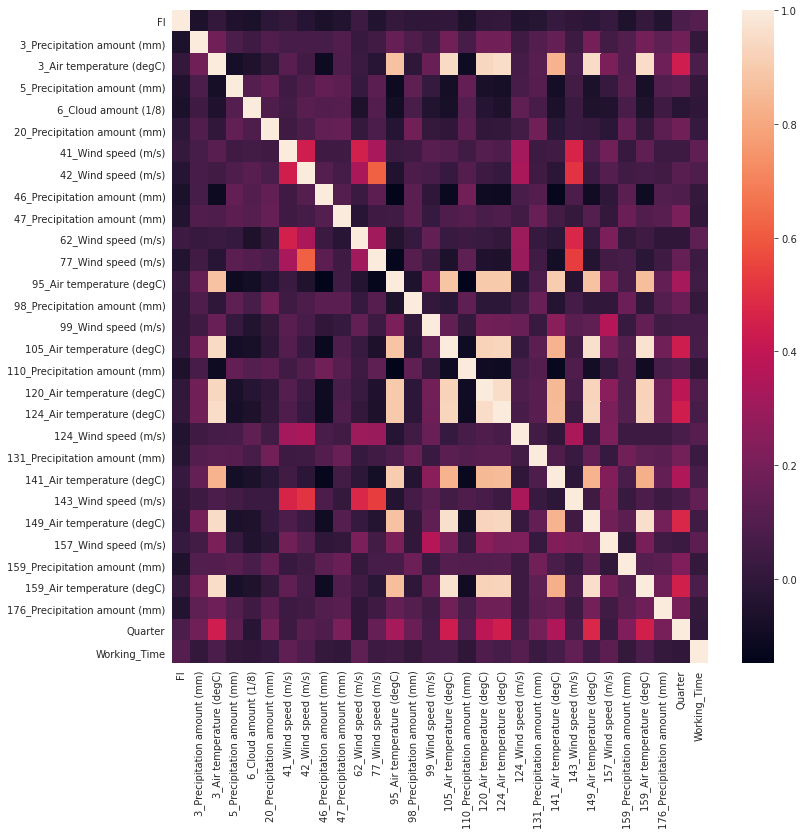

In [12]:
plt.figure(figsize=(12,12))
sns.heatmap(X.corr(),annot=False) 

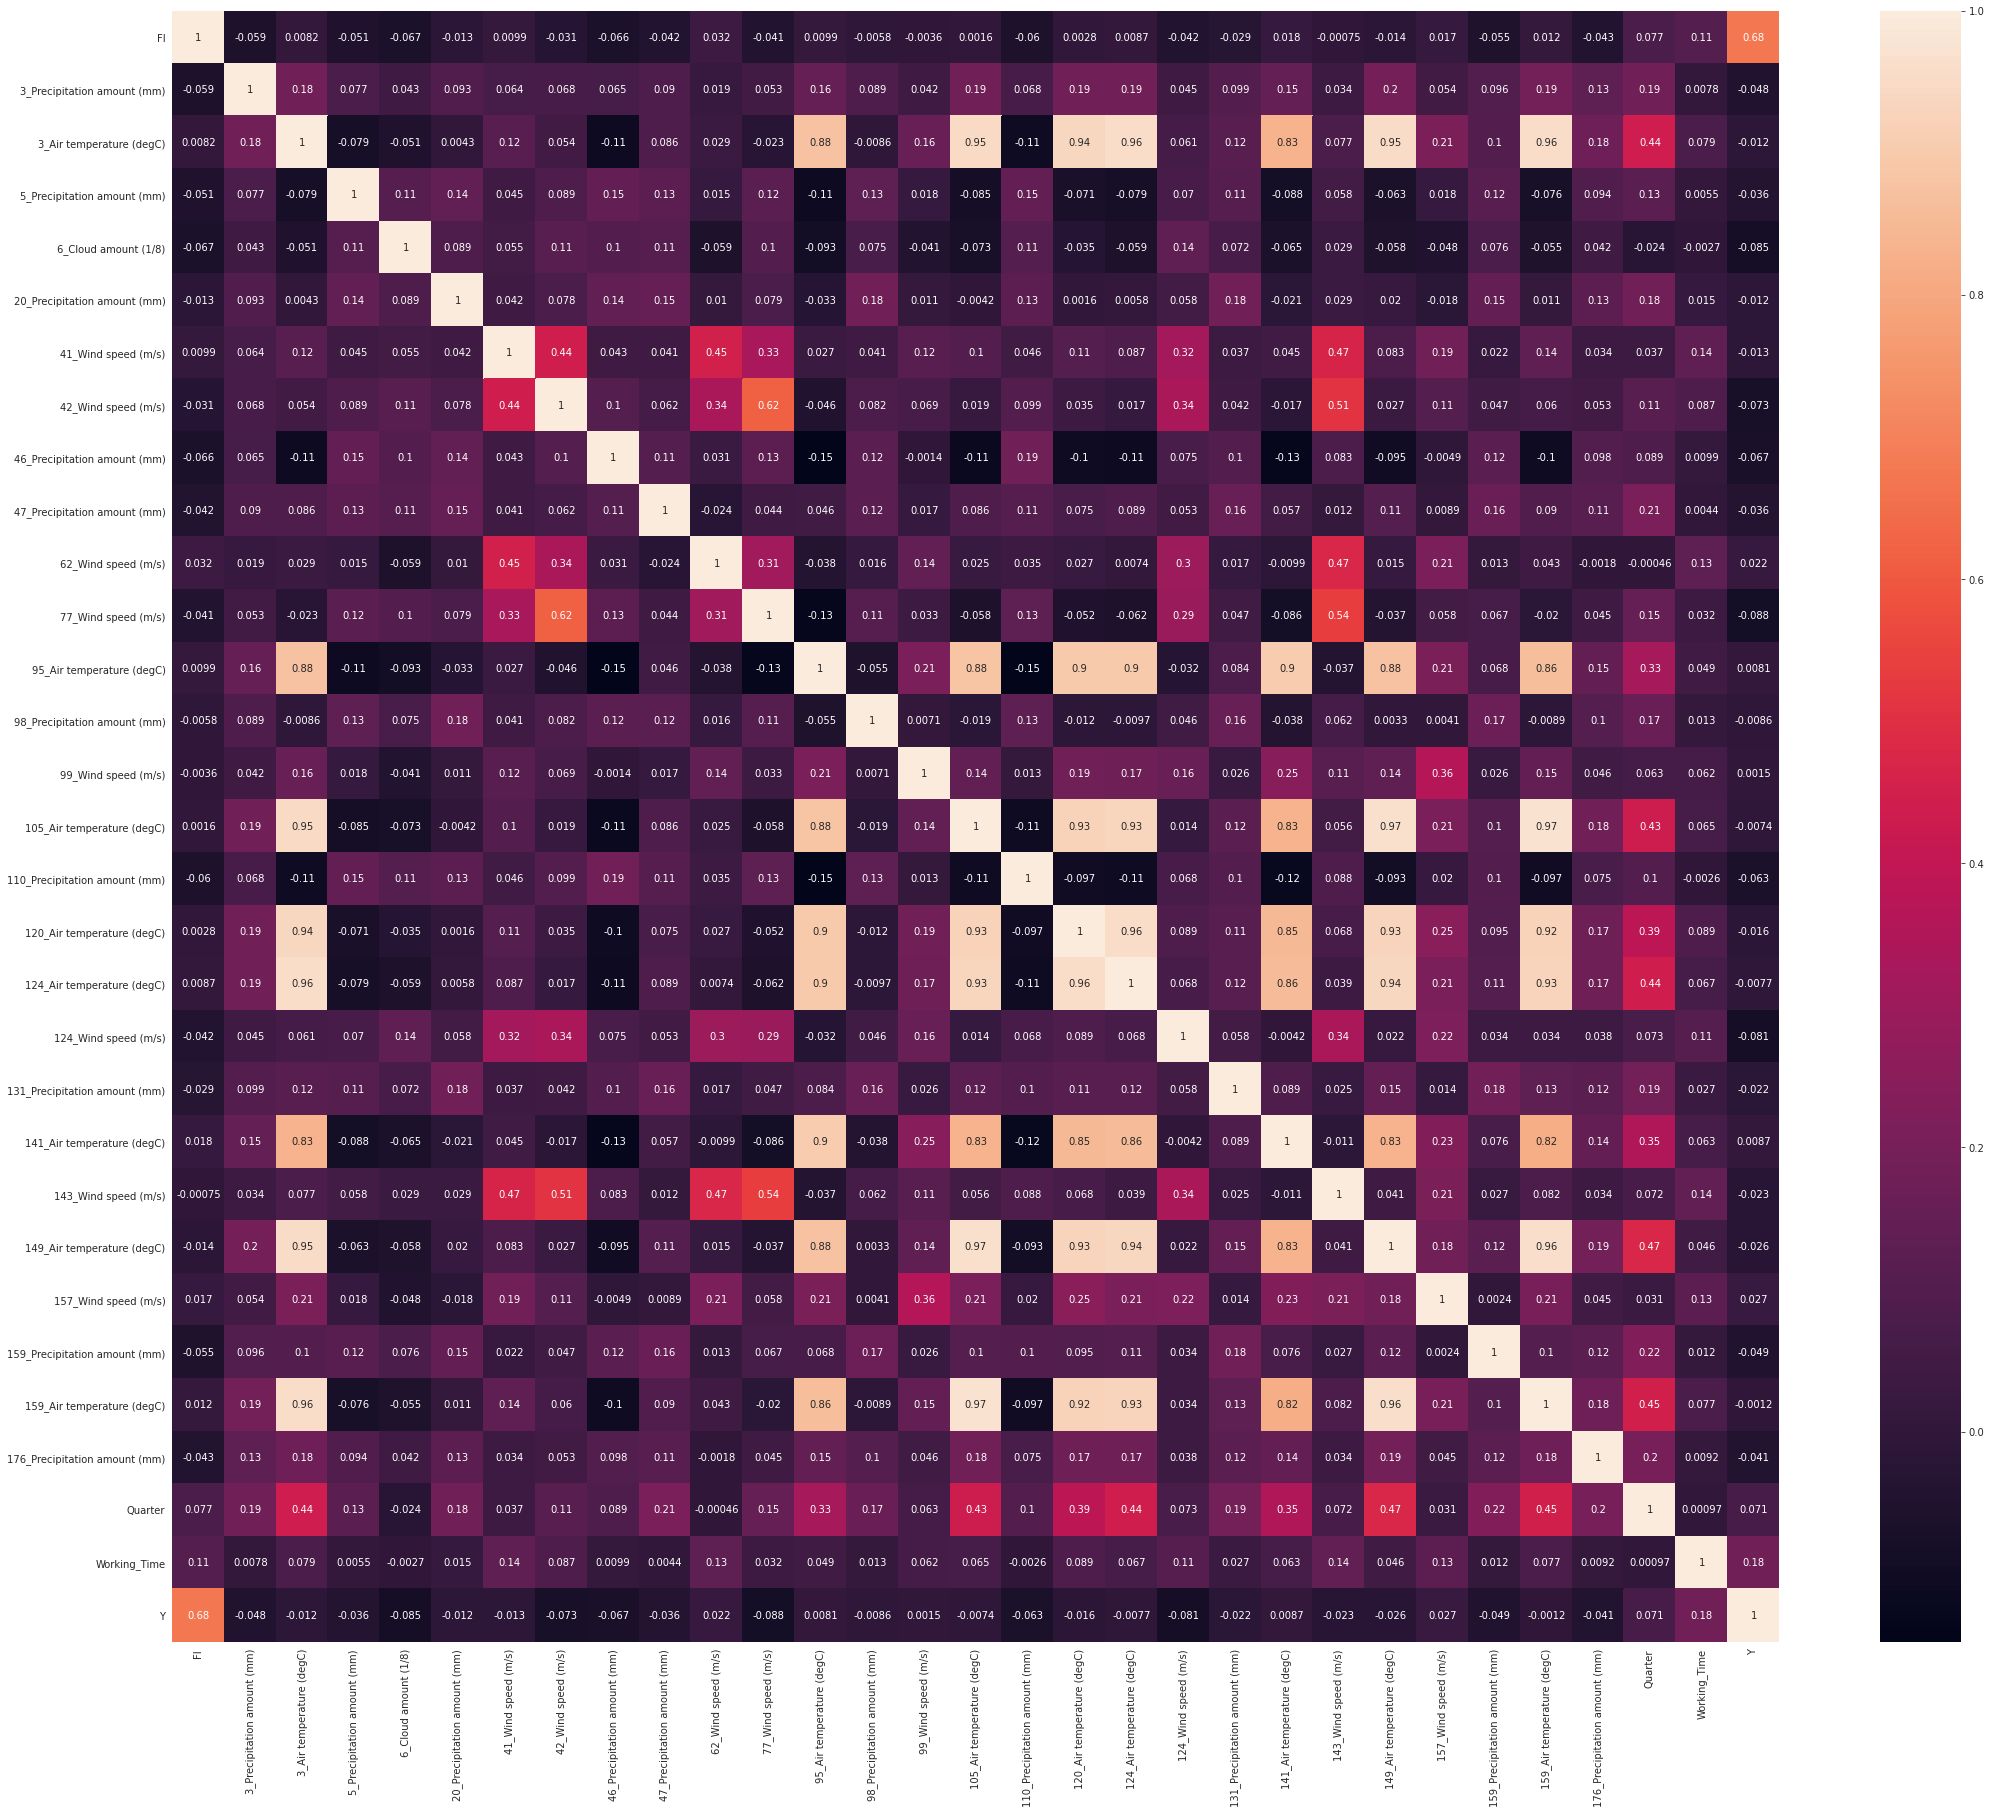

In [13]:
Y_temp = Y.copy()
Y_temp.index = Y_temp.index + DateOffset(hours=-hour_ahead)
Y_temp.rename('Y', inplace=True)
XY = X.copy()
XY = XY.join(Y_temp)
plt.figure(figsize=(36,30))
sns.heatmap(XY.corr(),annot=True) 

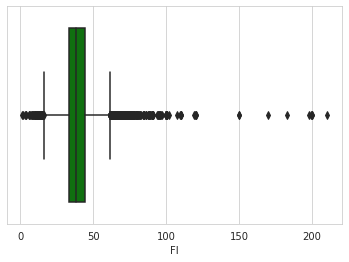

In [14]:
sns.boxplot(x=Y,color='green')

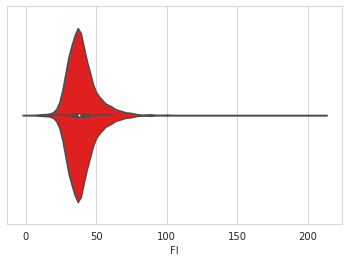

In [15]:
    sns.violinplot(x=Y,color='red')
    plt.savefig('Y_violinplot.png')

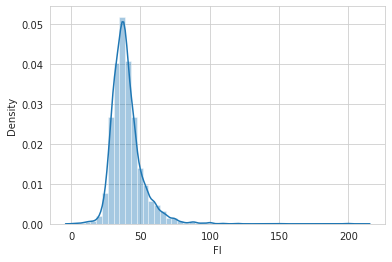

In [16]:
import warnings
warnings.filterwarnings("ignore")

sns.distplot(Y,kde=True) 

warnings.filterwarnings("default")

In [17]:
# demonstrate data standardization with sklearn
from sklearn.preprocessing import StandardScaler
# load data
StdX = X.copy()
print(StdX)
# create scaler
num_cols = StdX.columns

# apply standardization on numerical features
for i in num_cols:
    scale = StandardScaler().fit(StdX[[i]])
    StdX[i] = scale.transform(StdX[[i]])
    
print(StdX)
print(StdX.shape)

                        FI  3_Precipitation amount (mm)  ...  Quarter  Working_Time
DateTime                                                 ...                       
2013-01-01 00:00:00  31.04                    -1.659005  ...      1.0           0.0
2013-01-01 01:00:00  27.51                    -1.253168  ...      1.0           0.0
2013-01-01 02:00:00  24.44                    -1.457776  ...      1.0           0.0
2013-01-01 03:00:00  21.81                     1.250044  ...      1.0           0.0
2013-01-01 04:00:00  22.37                    -2.720464  ...      1.0           0.0
...                    ...                          ...  ...      ...           ...
2014-04-03 01:00:00  28.52                     1.472591  ...      2.0           1.0
2014-04-03 02:00:00  27.48                     0.796390  ...      2.0           1.0
2014-04-03 03:00:00  27.09                     0.070852  ...      2.0           1.0
2014-04-03 04:00:00  28.30                     0.345086  ...      2.0       

In [18]:
StdX.describe()

,FI,3_Precipitation amount (mm),3_Air temperature (degC),5_Precipitation amount (mm),6_Cloud amount (1/8),20_Precipitation amount (mm),41_Wind speed (m/s),42_Wind speed (m/s),46_Precipitation amount (mm),47_Precipitation amount (mm),62_Wind speed (m/s),77_Wind speed (m/s),95_Air temperature (degC),98_Precipitation amount (mm),99_Wind speed (m/s),105_Air temperature (degC),110_Precipitation amount (mm),120_Air temperature (degC),124_Air temperature (degC),124_Wind speed (m/s),131_Precipitation amount (mm),141_Air temperature (degC),143_Wind speed (m/s),149_Air temperature (degC),157_Wind speed (m/s),159_Precipitation amount (mm),159_Air temperature (degC),176_Precipitation amount (mm),Quarter,Working_Time
count,1.097600e+04,1.097600e+04,1.097600e+04,1.097600e+04,1.097600e+04,1.097600e+04,1.097600e+04,1.097600e+04,1.097600e+04,1.097600e+04,1.097600e+04,1.097600e+04,1.097600e+04,1.097600e+04,1.097600e+04,1.097600e+04,1.097600e+04,1.097600e+04,1.097600e+04,1.097600e+04,1.097600e+04,1.097600e+04,1.097600e+04,1.097600e+04,1.097600e+04,1.097600e+04,1.097600e+04,1.097600e+04,1.097600e+04,1.097600e+04
mean,8.028685e-16,4.432901e-16,7.341471e-16,5.416965e-17,-3.381244e-16,-1.409769e-15,5.828266e-17,-2.634453e-16,-3.555219e-16,2.055369e-16,-3.215712e-16,-9.517715e-17,5.067618e-16,1.745066e-16,-9.453484e-17,-7.530723e-16,7.697722e-16,-2.155710e-16,3.363138e-16,3.513175e-16,-1.306656e-16,9.388293e-16,3.016080e-16,-1.053397e-15,4.039175e-17,-5.185357e-16,2.661359e-16,8.468131e-16,-4.508555e-14,6.963170e-17
std,1.000046e+00,1.000046e+00,1.000046e+00,1.000046e+00,1.000046e+00,1.000046e+00,1.000046e+00,1.000046e+00,1.000046e+00,1.000046e+00,1.000046e+00,1.000046e+00,1.000046e+00,1.000046e+00,1.000046e+00,1.000046e+00,1.000046e+00,1.000046e+00,1.000046e+00,1.000046e+00,1.000046e+00,1.000046e+00,1.000046e+00,1.000046e+00,1.000046e+00,1.000046e+00,1.000046e+00,1.000046e+00,1.000046e+00,1.000046e+00
min,-3.314498e+00,-3.978668e+00,-2.890100e+00,-3.852474e+00,-2.335578e+00,-3.693323e+00,-2.953111e+00,-3.034262e+00,-3.683427e+00,-3.613625e+00,-2.961688e+00,-2.747043e+00,-2.791514e+00,-3.245405e+00,-2.553029e+00,-2.979802e+00,-3.177103e+00,-2.915613e+00,-3.011244e+00,-2.852365e+00,-3.472461e+00,-3.163312e+00,-2.631087e+00,-3.271249e+00,-2.743612e+00,-3.399017e+00,-3.371665e+00,-4.015278e+00,-1.043083e+00,-6.051394e-01
25%,-5.948413e-01,-6.506564e-01,-6.360759e-01,-6.705372e-01,-1.100306e+00,-6.667492e-01,-7.110747e-01,-7.058891e-01,-6.879102e-01,-6.659415e-01,-6.811066e-01,-7.196393e-01,-6.872333e-01,-6.551288e-01,-7.048437e-01,-6.704357e-01,-6.825172e-01,-6.143826e-01,-6.401880e-01,-7.004286e-01,-6.641709e-01,-5.611766e-01,-7.167690e-01,-6.477477e-01,-7.198693e-01,-6.661338e-01,-6.315511e-01,-6.508082e-01,-1.043083e+00,-6.051394e-01
50%,-1.653314e-01,-1.111834e-02,-1.066431e-01,8.166426e-04,4.327171e-01,-2.276469e-02,-9.544068e-02,-8.810858e-02,-1.727042e-02,5.363536e-03,-9.228397e-02,-1.022045e-01,-1.149354e-01,-1.953631e-02,-1.035284e-01,-1.274278e-01,-2.974686e-02,-8.403904e-02,-1.061195e-01,-1.094901e-01,-1.253806e-02,7.924578e-03,-5.956770e-02,-1.165862e-01,-9.069716e-02,-4.936345e-03,-1.105430e-01,6.042038e-03,-1.845887e-01,-6.051394e-01
75%,3.760657e-01,6.487707e-01,7.910424e-01,6.699596e-01,7.940168e-01,6.298777e-01,6.013559e-01,6.225384e-01,6.623810e-01,6.653297e-01,5.553324e-01,5.979977e-01,7.658982e-01,6.380353e-01,5.880103e-01,8.136825e-01,6.455069e-01,7.292672e-01,8.367897e-01,5.966695e-01,6.540938e-01,7.672594e-01,6.397879e-01,8.657782e-01,6.125283e-01,6.421902e-01,8.000876e-01,6.519446e-01,6.739053e-01,1.652512e+00
max,1.460723e+01,1.655755e+01,2.692224e+00,5.771313e+00,1.905508e+00,1.208407e+01,5.812518e+00,5.615988e+00,7.415300e+00,5.701237e+00,6.587924e+00,4.072262e+00,2.789339e+00,1.399726e+01,5.355491e+00,2.612782e+00,7.465873e+00,2.514229e+00,2.726946e+00,5.063941e+00,7.836977e+00,2.466265e+00,4.988776e+00,2.756473e+00,5.221589e+00,1.274258e+01,2.540806e+00,1.588024e+01,1.532399e+00,1.652512e+00


In [19]:
# demonstrate data standardization with sklearn
from sklearn.preprocessing import StandardScaler
Y_temp = Y.copy()
Y_temp.index = Y_temp.index + DateOffset(hours=-hour_ahead)
Y_temp.rename('Y', inplace=True)
XY = X.copy()
XY = XY.join(Y_temp)
StdXY = XY.copy()
print(StdXY)
# create scaler
num_cols = StdXY.columns

# apply standardization on numerical features
for i in num_cols:
    scale = StandardScaler().fit(StdXY[[i]])
    StdXY[i] = scale.transform(StdXY[[i]])
    
print(StdXY)
print(StdXY.shape)

                        FI  3_Precipitation amount (mm)  ...  Working_Time      Y
DateTime                                                 ...                     
2013-01-01 00:00:00  31.04                    -1.659005  ...           0.0  32.84
2013-01-01 01:00:00  27.51                    -1.253168  ...           0.0  32.35
2013-01-01 02:00:00  24.44                    -1.457776  ...           0.0  31.83
2013-01-01 03:00:00  21.81                     1.250044  ...           0.0  32.17
2013-01-01 04:00:00  22.37                    -2.720464  ...           0.0  32.97
...                    ...                          ...  ...           ...    ...
2014-04-03 01:00:00  28.52                     1.472591  ...           1.0  25.81
2014-04-03 02:00:00  27.48                     0.796390  ...           1.0  25.88
2014-04-03 03:00:00  27.09                     0.070852  ...           1.0  25.07
2014-04-03 04:00:00  28.30                     0.345086  ...           1.0  25.90
2014-04-03 05:00

In [20]:
StdXY.describe()

,FI,3_Precipitation amount (mm),3_Air temperature (degC),5_Precipitation amount (mm),6_Cloud amount (1/8),20_Precipitation amount (mm),41_Wind speed (m/s),42_Wind speed (m/s),46_Precipitation amount (mm),47_Precipitation amount (mm),62_Wind speed (m/s),77_Wind speed (m/s),95_Air temperature (degC),98_Precipitation amount (mm),99_Wind speed (m/s),105_Air temperature (degC),110_Precipitation amount (mm),120_Air temperature (degC),124_Air temperature (degC),124_Wind speed (m/s),131_Precipitation amount (mm),141_Air temperature (degC),143_Wind speed (m/s),149_Air temperature (degC),157_Wind speed (m/s),159_Precipitation amount (mm),159_Air temperature (degC),176_Precipitation amount (mm),Quarter,Working_Time,Y
count,1.097800e+04,1.097800e+04,1.097800e+04,1.097800e+04,1.097800e+04,1.097800e+04,1.097800e+04,1.097800e+04,1.097800e+04,1.097800e+04,1.097800e+04,1.097800e+04,1.097800e+04,1.097800e+04,1.097800e+04,1.097800e+04,1.097800e+04,1.097800e+04,1.097800e+04,1.097800e+04,1.097800e+04,1.097800e+04,1.097800e+04,1.097800e+04,1.097800e+04,1.097800e+04,1.097800e+04,1.097800e+04,1.097800e+04,1.097800e+04,1.097800e+04
mean,2.376138e-16,3.644784e-17,4.340873e-16,-1.150701e-16,-1.864463e-16,-8.627742e-16,1.572597e-16,-7.940856e-17,-1.025312e-16,7.522777e-16,-1.669936e-16,5.424397e-16,9.819376e-16,4.799454e-16,2.739100e-16,9.121871e-16,8.390082e-16,-5.957361e-16,1.444261e-16,7.134204e-18,-1.067748e-16,3.270293e-16,-2.114473e-16,5.888693e-16,-1.927518e-16,-6.142735e-17,-6.029063e-16,-3.401006e-16,-3.443030e-14,1.173127e-18,6.799509e-16
std,1.000046e+00,1.000046e+00,1.000046e+00,1.000046e+00,1.000046e+00,1.000046e+00,1.000046e+00,1.000046e+00,1.000046e+00,1.000046e+00,1.000046e+00,1.000046e+00,1.000046e+00,1.000046e+00,1.000046e+00,1.000046e+00,1.000046e+00,1.000046e+00,1.000046e+00,1.000046e+00,1.000046e+00,1.000046e+00,1.000046e+00,1.000046e+00,1.000046e+00,1.000046e+00,1.000046e+00,1.000046e+00,1.000046e+00,1.000046e+00,1.000046e+00
min,-3.314549e+00,-3.978376e+00,-2.890384e+00,-3.852413e+00,-2.335761e+00,-3.693529e+00,-2.953043e+00,-3.034532e+00,-3.680336e+00,-3.613265e+00,-2.961886e+00,-2.746991e+00,-2.791751e+00,-3.244607e+00,-2.553005e+00,-2.980099e+00,-3.177145e+00,-2.915909e+00,-3.011540e+00,-2.852609e+00,-3.472735e+00,-3.163527e+00,-2.631351e+00,-3.271562e+00,-2.743894e+00,-3.399039e+00,-3.371965e+00,-4.015439e+00,-1.043234e+00,-6.050641e-01,-3.316041e+00
25%,-5.947522e-01,-6.507816e-01,-6.360000e-01,-6.706848e-01,-1.100324e+00,-6.669115e-01,-7.112300e-01,-7.059359e-01,-6.878225e-01,-6.660589e-01,-6.809535e-01,-7.196811e-01,-6.870111e-01,-6.550272e-01,-7.048732e-01,-6.704511e-01,-6.826612e-01,-6.142395e-01,-6.402585e-01,-7.004387e-01,-6.642862e-01,-5.611498e-01,-7.168507e-01,-6.477991e-01,-7.198453e-01,-6.661200e-01,-6.314334e-01,-6.506429e-01,-1.043234e+00,-6.050641e-01,-5.957247e-01
50%,-1.652202e-01,-1.221585e-02,-1.062466e-01,6.741295e-04,4.327468e-01,-2.283145e-02,-9.533521e-02,-8.820658e-02,-1.758163e-02,5.233785e-03,-9.243935e-02,-1.022781e-01,-1.148175e-01,-1.958580e-02,-1.032187e-01,-1.271698e-01,-2.984937e-02,-8.387101e-02,-1.058376e-01,-1.093611e-01,-1.260435e-02,7.731593e-03,-5.884203e-02,-1.165848e-01,-9.041980e-02,-4.825493e-03,-1.105293e-01,5.825410e-03,-1.848452e-01,-6.050641e-01,-1.661107e-01
75%,3.757754e-01,6.489013e-01,7.908386e-01,6.700713e-01,7.940584e-01,6.299376e-01,6.011688e-01,6.233435e-01,6.612747e-01,6.651815e-01,5.552756e-01,5.977105e-01,7.656469e-01,6.381925e-01,5.880229e-01,8.134587e-01,6.461950e-01,7.290369e-01,8.364944e-01,5.972284e-01,6.547890e-01,7.672502e-01,6.396765e-01,8.655922e-01,6.124202e-01,6.421268e-01,7.998748e-01,6.520252e-01,6.735434e-01,1.652718e+00,3.767067e-01
max,1.460811e+01,1.655738e+01,2.692439e+00,5.770598e+00,1.905328e+00,1.208400e+01,5.812832e+00,5.616126e+00,7.407167e+00,5.699847e+00,6.588528e+00,4.071497e+00,2.789607e+00,1.399540e+01,5.354587e+00,2.612881e+00,7.465185e+00,2.514390e+00,2.727161e+00,5.063981e+00,7.837148e+00,2.466523e+00,4.988965e+00,2.756563e+00,5.221893e+00,1